# Game of Drones on a Graph - Sequential version

This notebook contains the code which supports the paper on the Game of Drones on a Graph. In this paper, various game-theoretic calculations are performed and the results are included in the paper again.

Through this notebook, any data sets, assumptions, calculation methods etc are made available to support transparency and clarity.

Comments and/or suggestions can be addressed to Rene Thaens, via r.thaens@tilburguniversity.edu

## Change Log
20251107_0956 Initial commit to GitHub


## 1 - Introduction

First, we import relevant packages and generate the example graph used in the paper.

Simulation date 03052025 at 10:19:42
Output file name starts with: '20250503_101919_vSQ_'



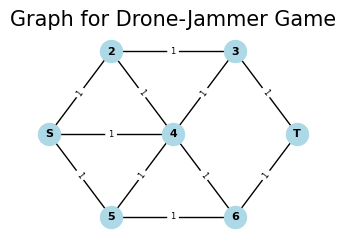

In [1]:
from IPython.display import display, Latex

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import datetime as dt
import LATEXsupport as ls

# define administrative arrangements:
version = 'SQ'
now = dt.datetime.now()
outfile_header = f"{now.year}{now.month:02d}{now.day:02d}_{now.hour:02d}{now.minute:02d}{now.minute:02d}_v{version}_"
print(f"Simulation date {now.day:02d}{now.month:02d}{now.year} at {now.hour:02d}:{now.minute:02d}:{now.second:02d}")
print(f"Output file name starts with: '{outfile_header}'\n")

# Generate the graph from the paper:
G = nx.Graph()

# Add nodes (vertices)
nodes = ['S', '2', '3', '4', '5', '6', 'T']
jammer_nodes = ['2', '3', '4', '5', '6']
G.add_nodes_from(nodes)

# Add edges with distances
edges = [
    ('S', '2', 1), ('S', '4', 1), ('S', '5', 1), ('2', '3', 1), ('2', '4', 1),
    ('3', '4', 1), ('3', 'T', 1), ('4', '5', 1), ('4', '6', 1),
    ('5', '6', 1), ('6', 'T', 1)
]

for u, v, d in edges:
    G.add_edge(u, v, weight=d)

# Set positions for drawing
pos = {
    'S': (0, 1), '2': (1, 2), '3': (3, 2), '4': (2, 1),
    '5': (1, 0), '6': (3, 0), 'T': (4, 1)
}

# Draw the graph
def draw_graph(G, pos, fig_close=False):

    plt.figure(figsize=(3, 2))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=250, font_size=8, font_weight='bold')
    
    # Draw edge labels
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
    
    plt.title("Graph for Drone-Jammer Game", fontsize=15)
    plt.savefig(f'{outfile_header}graph.png', dpi=300, bbox_inches='tight')

    if fig_close:
        plt.close()

draw_graph(G, pos, fig_close=False)

## 2 - Define constants and variables

In [2]:
# define constants and parameters
B = 5            # battery duration in distance units (here 'hops')
M = 1000         # gamma value for the lexord functie 
Pj = 1        # risk probability on an edge adjacent to jammer node

## 3 - Generate paths from S to T

This part generates all viable paths from node S to node T. Once done, it generates a LaTeX output text file which contains the proper LaTeX code for the related table in the paper.

In [3]:
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    paths = []
    for node in graph.neighbors(start):
        if node not in path:
            new_paths = find_all_paths(graph, node, end, path)
            paths.extend(new_paths)
    return paths


all_paths = find_all_paths(G, 'S', 'T')
ls.paths_to_LaTeX_table(all_paths, outfile_header)


def pathlengths(paths):
    path_lengths = {}
    for i, path in enumerate(all_paths):
        length = 0
        for j in range(len(path) - 1):
            length += G[path[j]][path[j+1]]['weight']
        path_lengths[i] = length
    return(path_lengths)

path_lengths = pathlengths(all_paths)
# Print all paths and their lengths
print("All possible paths from S to T:")
for i, path in enumerate(all_paths):
    print(f"Path {i+1}: {' -> '.join(path)}, Length: {path_lengths[i]}")

# Define max distance based on battery B in edges:
print(f"\nMax distance for drone L_max: {B} edges")
print("Viable paths (length <= B):")
feasible_paths = []
for i, path in enumerate(all_paths):
    if path_lengths[i] <= B:
        feasible_paths.append(path)
        print(f"Path {i+1}: {' -> '.join(path)}, Length: {path_lengths[i]}")

path_labels = [f"Path {all_paths.index(path)+1}" for path in feasible_paths]

File 20250503_101919_vSQ_path_table.txt completed
All possible paths from S to T:
Path 1: S -> 2 -> 3 -> 4 -> 5 -> 6 -> T, Length: 6
Path 2: S -> 2 -> 3 -> 4 -> 6 -> T, Length: 5
Path 3: S -> 2 -> 3 -> T, Length: 3
Path 4: S -> 2 -> 4 -> 3 -> T, Length: 4
Path 5: S -> 2 -> 4 -> 5 -> 6 -> T, Length: 5
Path 6: S -> 2 -> 4 -> 6 -> T, Length: 4
Path 7: S -> 4 -> 2 -> 3 -> T, Length: 4
Path 8: S -> 4 -> 3 -> T, Length: 3
Path 9: S -> 4 -> 5 -> 6 -> T, Length: 4
Path 10: S -> 4 -> 6 -> T, Length: 3
Path 11: S -> 5 -> 4 -> 2 -> 3 -> T, Length: 5
Path 12: S -> 5 -> 4 -> 3 -> T, Length: 4
Path 13: S -> 5 -> 4 -> 6 -> T, Length: 4
Path 14: S -> 5 -> 6 -> 4 -> 2 -> 3 -> T, Length: 6
Path 15: S -> 5 -> 6 -> 4 -> 3 -> T, Length: 5
Path 16: S -> 5 -> 6 -> T, Length: 3

Max distance for drone L_max: 5 edges
Viable paths (length <= B):
Path 2: S -> 2 -> 3 -> 4 -> 6 -> T, Length: 5
Path 3: S -> 2 -> 3 -> T, Length: 3
Path 4: S -> 2 -> 4 -> 3 -> T, Length: 4
Path 5: S -> 2 -> 4 -> 5 -> 6 -> T, Length: 5

## 4 - Risk calculation

In our jammer risk model, we assume the jammer to occupy a node in the graph. Any edge connected to this node, will incur a risk $p$ for traversing this node.

The total risk along a path is calculated as follows:

\begin{equation}
    R(p) = 1 = \prod_{e_i in path} (1 - p_i)
\end{equation}
for each edge $e_i$ in the path. The risk for an edge adjacent to a jammer node is:
\begin{equation}
    p_i = 0.5
\end{equation}
The following code plots the risk matrix and saves this heatmap file in a .png file

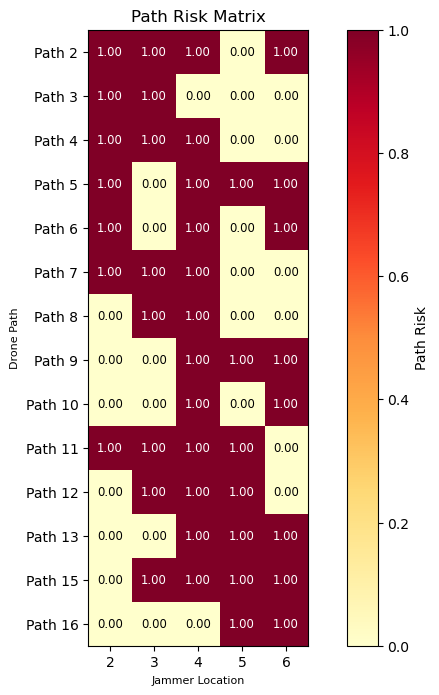

In [4]:
# Create a visualization showing risk values for each path and jammer location
plt.figure(figsize=(10, 8))
risk_matrix = np.zeros((len(feasible_paths), len(jammer_nodes)))

for i, path in enumerate(feasible_paths):
    for j, jammer_loc in enumerate(jammer_nodes):
        # Calculate risk using the probabilistic model
        edge_risks = []
        for k in range(len(path) - 1):
            if path[k] == jammer_loc or path[k+1] == jammer_loc:
                edge_risk = Pj
            else:
                edge_risk = 0.0
            edge_risks.append(edge_risk)

        product = 1.0
        for risk in edge_risks:
            product *= (1 - risk)

        path_risk = 1 - product
        risk_matrix[i, j] = path_risk

plt.imshow(risk_matrix, cmap='YlOrRd')
plt.colorbar(label='Path Risk')
plt.title('Path Risk Matrix', fontsize=12)
plt.xlabel('Jammer Location', fontsize=8)
plt.ylabel('Drone Path', fontsize=8)
plt.xticks(range(len(jammer_nodes)), jammer_nodes)
plt.yticks(range(len(feasible_paths)), path_labels)

# Add text annotations in the heatmap cells
for i in range(len(feasible_paths)):
    for j in range(len(jammer_nodes)):
        plt.text(j, i, f"{risk_matrix[i, j]:.2f}", size='small',
                 ha="center", va="center", color="black" if risk_matrix[i, j] < 0.5 else "white")

plt.savefig(f'{outfile_header}risk_matrix.png', dpi=300, bbox_inches='tight')
#plt.close()

## 5 - Payoff Matrix $U(p,j)$

Calculate the payoff matrix and print this matrix including proper LaTeX characters for inclusion in the paper. 

The utility or payoff $U$ is calculated from the path's value for each of the jammer nodes, as follows:

\begin{equation} \label{eq:LexOrd2Payoff}
    u(p,j) = 
    \begin{cases}
            - \gamma R^{(j)}(p) - L(p) & \text{if } L(p) \leq B  \\
            - \infty & \text{otherwise}
    \end{cases}
\end{equation}

In this example, we use $\gamma = 1000$.

In [5]:
print("\nUpdated Risk calculation for each path and jammer location:")
print("Using probabilistic risk model: R(P) = 1 - ∏(1 - r(e_i))")
print(f"Risk for edges adjacent to jammer = {Pj}, Risk for other edges = 0")

# Create payoff matrix
payoff_matrix = np.zeros((len(feasible_paths), len(jammer_nodes)))

for i, path in enumerate(feasible_paths):
    path_idx = all_paths.index(path)
    print(f"\nPath {path_idx+1}: {' -> '.join(path)}, Length: {path_lengths[path_idx]}")

    for j, jammer_loc in enumerate(jammer_nodes):
        # Calculate risk using the probabilistic model
        path_risk = 0
        edge_risks = []

        for k in range(len(path) - 1):
            edge = (path[k], path[k+1])
            # Check if edge is adjacent to jammer
            if path[k] == jammer_loc or path[k+1] == jammer_loc:
                edge_risk = Pj  # Risk for edges adjacent to jammer
            else:
                edge_risk = 0.0  # Risk for other edges

            edge_risks.append(edge_risk)

        # Calculate total path risk using the formula R(P) = 1 - ∏(1 - r(e_i))
        product = 1.0
        for risk in edge_risks:
            product *= (1 - risk)

        path_risk = 1 - product

        # Calculate utility (negative because drone wants to minimize risk)
        # Using a large constant M to prioritize risk over distance
        utility = -M * path_risk - path_lengths[path_idx]
        payoff_matrix[i, j] = utility

        # Print detailed risk calculation
        print(f"  Jammer at {jammer_loc}:")
        print(f"    Edge risks: {edge_risks}")
        print(f"    Path risk: {path_risk:.4f}")
        print(f"    Utility: {utility:.2f}")




Updated Risk calculation for each path and jammer location:
Using probabilistic risk model: R(P) = 1 - ∏(1 - r(e_i))
Risk for edges adjacent to jammer = 1, Risk for other edges = 0

Path 2: S -> 2 -> 3 -> 4 -> 6 -> T, Length: 5
  Jammer at 2:
    Edge risks: [1, 1, 0.0, 0.0, 0.0]
    Path risk: 1.0000
    Utility: -1005.00
  Jammer at 3:
    Edge risks: [0.0, 1, 1, 0.0, 0.0]
    Path risk: 1.0000
    Utility: -1005.00
  Jammer at 4:
    Edge risks: [0.0, 0.0, 1, 1, 0.0]
    Path risk: 1.0000
    Utility: -1005.00
  Jammer at 5:
    Edge risks: [0.0, 0.0, 0.0, 0.0, 0.0]
    Path risk: 0.0000
    Utility: -5.00
  Jammer at 6:
    Edge risks: [0.0, 0.0, 0.0, 1, 1]
    Path risk: 1.0000
    Utility: -1005.00

Path 3: S -> 2 -> 3 -> T, Length: 3
  Jammer at 2:
    Edge risks: [1, 1, 0.0]
    Path risk: 1.0000
    Utility: -1003.00
  Jammer at 3:
    Edge risks: [0.0, 1, 1]
    Path risk: 1.0000
    Utility: -1003.00
  Jammer at 4:
    Edge risks: [0.0, 0.0, 0.0]
    Path risk: 0.0000
    U

Output the payoff matrix as a heatmap and save as .png file

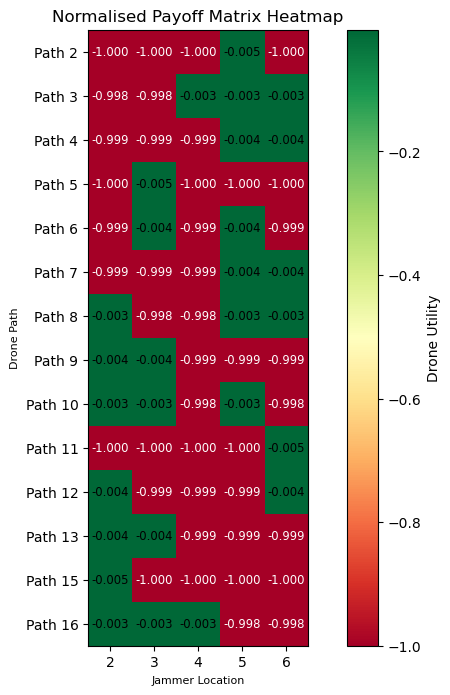

In [10]:
# Visualize the payoff matrix as a heatmap
max_payoff = 1005   # = -gamma*1 - B

norm_payoff_matrix = payoff_matrix / max_payoff

plt.figure(figsize=(10, 8))
plt.imshow(norm_payoff_matrix, cmap='RdYlGn')
plt.colorbar(label='Drone Utility')
plt.title('Normalised Payoff Matrix Heatmap', fontsize=12)
plt.xlabel('Jammer Location', fontsize=8)
plt.ylabel('Drone Path', fontsize=8)
plt.xticks(range(len(jammer_nodes)), jammer_nodes)
path_labels = [f"Path {all_paths.index(path)+1}" for path in feasible_paths]
plt.yticks(range(len(feasible_paths)), path_labels)

# Add text annotations in the heatmap cells
for i in range(len(feasible_paths)):
    for j in range(len(jammer_nodes)):
        plt.text(j, i, f"{norm_payoff_matrix[i, j]:.3f}", size='small',
                 ha="center", va="center", color="white" if payoff_matrix[i, j] < -50 else "black")

plt.savefig(f'{outfile_header}payoff_matrix.png', dpi=300, bbox_inches='tight')
#plt.close()


# Game Value

The game value follows from the optimal strategy, applied to the payoff matrix. In our example, we have identified a set of four dominant strategies [3,8,10,16] which are sufficient to cover all possibilities in the game. Therefore, other paths can be disregarded for this analysis.

\begin{equation} \label{eq:ExpectedUtility}
    \mathbb{E}[U] = p^T_d.U.p_j
\end{equation}
for which the optimal value follows from
\begin{align} \label{eq:ValueOfTheGameV}
V = \min_{\boldsymbol{p}_j \in \mathbb{P}_j} \max_{\boldsymbol{p}_d \in \mathbb{P}_d} \boldsymbol{p}_d^\top U \boldsymbol{p}_j = \max_{\boldsymbol{p}_d \in \mathbb{P}_d} \min_{\boldsymbol{p}_j \in \mathbb{P}_j} \boldsymbol{p}_d^\top U \boldsymbol{p}_j
\end{align}

In our example, we solve eq. \ref{eq:ValueOfTheGameV} via linear programming, using the payoff matrix from table \ref{tab:DominatingStrategie} for only the dominating strategies:

\begin{equation*}
    \begin{bmatrix}
        -0.749 & -0.003  & -0.003  & -0.003  \\
        -0.749 & -0.749 & -0.003  & -0.003  \\
        -0.003  & -0.749 & -0.749 & -0.003  \\
        -0.003  & -0.003  & -0.003  & -0.749 \\
        -0.003  & -0.003  & -0.749 & -0.749 \\
    \end{bmatrix}.
    \begin{bmatrix}
        p_{d_1} \\
        p_{d_2} \\
        p_{d_3} \\
        p_{d_4}
    \end{bmatrix} \geq V
\end{equation*}

Solving this system of equations shows a expected value of \textbf{-40.5} for a combination $\mathcal{P}_d = [0.5, 0, 0, 0.5]$. Based on symmetry considerations of the matrix $\mathcal{U}$, combinations of Path 3 ($p_{d_1}=0.5$) and Path 10 (p=0.5) and Path 8 (p=0.5) with Path 16 (p=0.5) yield the same value of $V=-40.5$. 

Similarly, the optimal probability distribution $\mathcal{P}_j = [p_{j_1}, p_{j_2}, p_{j_3}, p_{j_4}, p_{j_5}$] for the jammer location is found via solving the system of equations from $\mathcal{P}_j.P^T \geq V_j$.
\begin{equation*}
    \begin{bmatrix}
        -0.749  & -0.749 & -0.003 & -0.003  & -0.003 \\
        -0.003  & -0.749 & -0.749 & -0.003  & -0.003 \\
        -0.003  & -0.003 & -0.749 & -0.003  & -0.749 \\
        -0.003  & -0.003 & -0.003 & -0.749  & -0.749 \\
    \end{bmatrix}.
    \begin{bmatrix}
        p_{j_1} \\
        p_{j_2} \\
        p_{j_3} \\
        p_{j_4} \\
        p_{j_5}
    \end{bmatrix} \geq V_j
\end{equation*} or
\begin{equation*}
    \begin{bmatrix}
        -0.749  & -0.749 & -0.003 & -0.003  & -0.003 \\
        -0.003  & -0.749 & -0.749 & -0.003  & -0.003 \\
        -0.003  & -0.003 & -0.749 & -0.003  & -0.749 \\
        -0.003  & -0.003 & -0.003 & -0.749  & -0.749 \\
    \end{bmatrix}.
    \begin{bmatrix}
        p_{j_1} \\
        p_{j_2} \\
        p_{j_3} \\
        p_{j_4} \\
        p_{j_5}
    \end{bmatrix} - Vj \leq 0
\end{equation*} 




In [32]:
import numpy as np
from scipy.optimize import linprog

def solve_stackelberg_zero_sum(U_d):
    """
    Solves a Stackelberg zero-sum game where the jammer leads
    and the drone responds optimally.

    Args:
        U_d (np.ndarray): Payoff matrix for the drone (m x n).

    Returns:
        x_opt (np.ndarray): Optimal mixed strategy for the jammer.
        game_value (float): Value of the game for the drone.
    """
    m, n = U_d.shape

    # LP variables: x = [x_1, ..., x_m, v]
    # Goal: minimize v
    # Constraints: sum_i x_i * U_d[i][j] <= v for all j
    #              sum_i x_i = 1
    #              x_i >= 0

    # Number of variables: m probabilities + 1 scalar v
    c = np.zeros(m + 1)
    c[-1] = 1  # Objective: minimize v

    # Constraints: A_ub @ x <= b_ub
    A_ub = []
    b_ub = []

    # For each drone action j, ensure expected utility <= v
    for j in range(n):
        constraint = list(U_d[:, j]) + [-1]  # ∑ x_i * U_d[i,j] - v <= 0
        A_ub.append(constraint)
        b_ub.append(0)

    A_eq = [ [1] * m + [0] ]  # sum of x_i = 1
    b_eq = [1]

    bounds = [(0, 1)] * m + [(None, None)]  # x_i ∈ [0,1], v ∈ ℝ

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

    if res.success:
        x_opt = res.x[:m]
        game_value = res.x[-1]
        return x_opt, game_value
    else:
        raise ValueError("Linear program did not converge.")

# Example usage:
# Replace with your actual matrix from the paper
U_d = np.array([
    [-0.749, -0.003, -0.003, -0.003],
    [-0.003, -0.749, -0.749, -0.003],
    [-0.003, -0.003, -0.003, -0.749],
    [-0.003, -0.003, -0.749, -0.749]
])

x_star, v_star = solve_stackelberg_zero_sum(U_d)
print("Optimal jammer strategy:", x_star)
print("Value of the game (drone's perspective):", v_star)



Optimal jammer strategy: [0.33333333 0.33333333 0.33333333 0.        ]
Value of the game (drone's perspective): -0.25166666666666665


In [27]:
A = np.array([[1, 1, 1], 
              [6, -4, 5],
              [5, 2, 2]])
B = np.array([2, 31, 13])

X = np.linalg.solve(A, B)

print(A,B,X)



[[ 1  1  1]
 [ 6 -4  5]
 [ 5  2  2]] [ 2 31 13] [ 3. -2.  1.]
